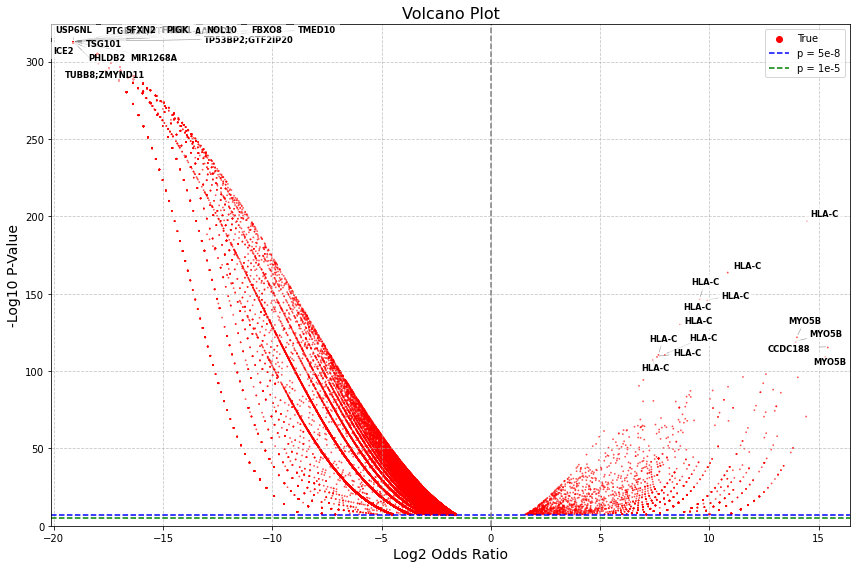

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Load the CSV file
df = pd.read_csv('filtered_volc.csv')

# Filter out rows with 'inf' in the second column and exactly 0 in the third column
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df_cleaned = df.dropna(subset=[df.columns[1]])
df_cleaned = df_cleaned[df_cleaned[df_cleaned.columns[2]] != 0]

# Calculate log2 odds ratios
df_cleaned['log2_odds_ratio'] = np.log2(df_cleaned[df_cleaned.columns[1]])

# Create the volcano plot
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(
    x=df_cleaned['log2_odds_ratio'],
    y=-np.log10(df_cleaned[df_cleaned.columns[2]]),
    hue=df_cleaned[df_cleaned.columns[2]] < 5e-8,
    palette={True: 'red', False: 'black'},
    legend="full",
    s=2.5,  # Reduce point size to 5% of the original size
    alpha=0.7,  # Adjust transparency for better visualization of overlapping points
    edgecolor=None  # Remove edge color for cleaner look
)

# Adding labels and title
plt.title('Volcano Plot', fontsize=16)
plt.xlabel('Log2 Odds Ratio', fontsize=14)
plt.ylabel('-Log10 P-Value', fontsize=14)

# Customizing the plot
plt.axhline(y=-np.log10(5e-8), color='blue', linestyle='--', label='p = 5e-8')
plt.axhline(y=-np.log10(1e-5), color='green', linestyle='--', label='p = 1e-5')
plt.axvline(x=0, color='grey', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_cleaned['log2_odds_ratio'].min() - 1, df_cleaned['log2_odds_ratio'].max() + 1)  # Extend the x-axis limits for better spread visualization
plt.ylim(0, -np.log10(8.81492722788449E-315) + 10)  # Adjust the y-axis limits based on the smallest p-value

# Highlight the top 15 significant points on the left and right sides
left_hits = df_cleaned[(df_cleaned[df_cleaned.columns[2]] < 5e-8) & (df_cleaned['log2_odds_ratio'] < 0)].sort_values(by=df_cleaned.columns[2]).head(15)
right_hits = df_cleaned[(df_cleaned[df_cleaned.columns[2]] < 5e-8) & (df_cleaned['log2_odds_ratio'] > 0)].sort_values(by=df_cleaned.columns[2]).head(15)
texts = []
for i, row in pd.concat([left_hits, right_hits]).iterrows():
    texts.append(plt.text(row['log2_odds_ratio'], -np.log10(row[df_cleaned.columns[2]]) + 0.5, row[df_cleaned.columns[0]],
             horizontalalignment='left', size='small', color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')))

# Adjust text to avoid overlap
adjust_text(texts, 
            only_move={'points':'y', 'text':'xy'}, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Adding legend for the lines
plt.legend(loc='upper right')

plt.tight_layout()

# Save the plot
plt.savefig('final_volcano_plot.png', dpi=600)
plt.show()
